In [1]:
import numpy as np
import pandas as pd
import datetime
!pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 510 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
ticker = []
ticker.append("SPY")
ticker.append("GOVT")
ticker.append("DBC")
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2022, 11, 9)
data = yf.download(tickers = ticker, start=start, end=end, interval = "1d")
data = data['Adj Close']
#size = len(ticker)

[*********************100%***********************]  3 of 3 completed


In [3]:
money = 1000000
weight = 1/3
amount_e = money*weight/data["SPY"][0]
amount_b = money*weight/data["GOVT"][0]
amount_c = money*weight/data["DBC"][0]
data["Portfolio_mix"] = amount_e*data["SPY"]+amount_b*data["GOVT"]+amount_c*data["DBC"]
data["Portfolio_equity"] = amount_e*data["SPY"]
data["Portfolio_bond"] = amount_e*data["GOVT"]
data["Portfolio_comm"] = amount_e*data["DBC"]

#plt.plot(data["GOVT"],data["DBC"])
#plt.show()

In [4]:
SPY_return = pd.DataFrame(data["SPY"].pct_change())
SPY_return["GOVT"] = data["GOVT"].pct_change()
SPY_return["DBC"] = data["DBC"].pct_change()
SPY_return["Port"] = weight*SPY_return["SPY"]+weight*SPY_return["GOVT"]+weight*SPY_return["DBC"]
SPY_return["SPY_cum"] = ((SPY_return["SPY"] + 1).cumprod())
SPY_return["GOVT_cum"] = ((SPY_return["GOVT"] + 1).cumprod())
SPY_return["DBC_cum"] = ((SPY_return["DBC"] + 1).cumprod())
SPY_return["Port_cum"] = ((SPY_return["Port"] + 1).cumprod())

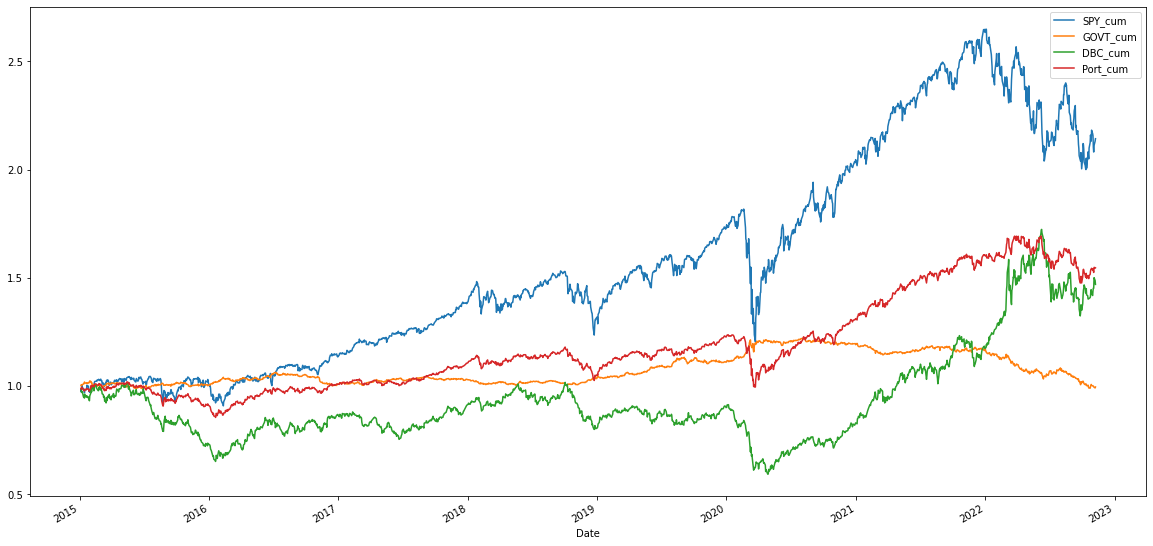

In [5]:
SPY_return[['SPY_cum','GOVT_cum','DBC_cum','Port_cum']].plot(figsize=(20, 10))

In [6]:
data.index = pd.to_datetime(data.index)
month_first = data[~data.index.to_period('m').duplicated()]


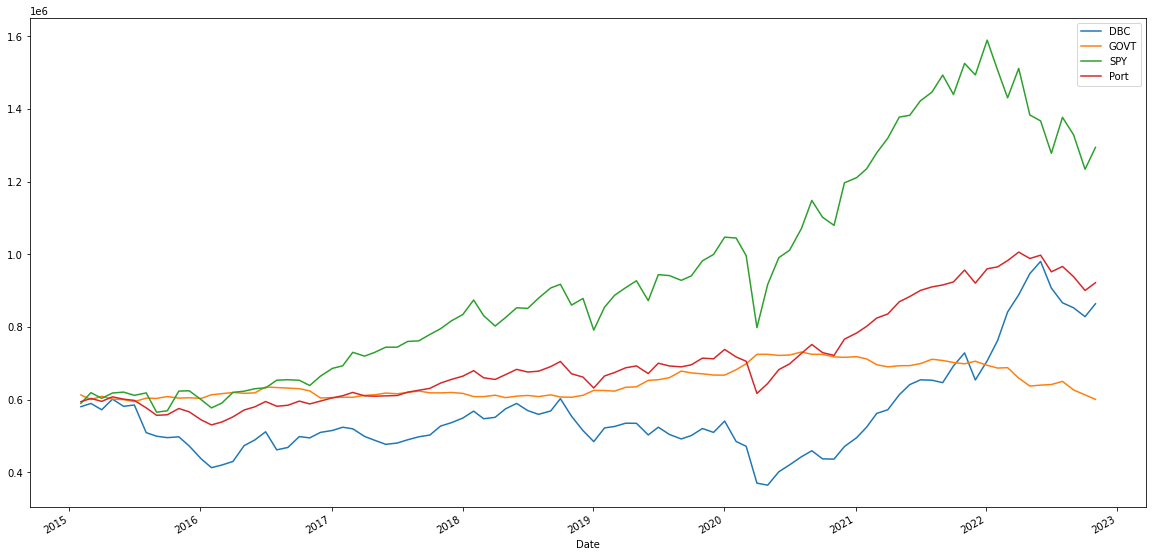

In [ ]:
month_first_returns = month_first.pct_change()
month_first_returns["Port"] = weight*month_first_returns["SPY"]+weight*month_first_returns["GOVT"]+weight*month_first_returns["DBC"]
(((month_first_returns + 1).cumprod())*600000).plot(figsize=(20, 10))

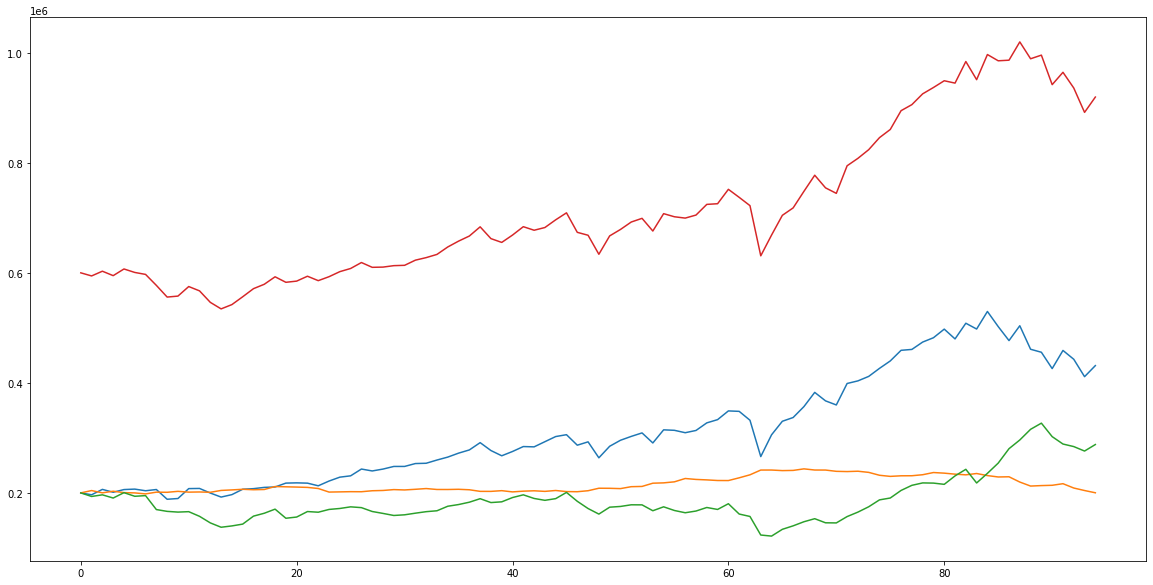

In [ ]:
e_sum = np.zeros([len(month_first_returns)])
b_sum = np.zeros([len(month_first_returns)])
c_sum = np.zeros([len(month_first_returns)])
total1 = np.zeros([len(month_first_returns)])
e_sum[0] = 200000
b_sum[0] = 200000
c_sum[0] = 200000
total1[0] = e_sum[0] + b_sum[0] + c_sum[0]
for i in range(len(month_first_returns)-1):
  e_sum[i+1] = (month_first_returns["SPY"].iloc[i+1:i+2].values+1)*e_sum[i]
  b_sum[i+1] = (month_first_returns["GOVT"].iloc[i+1:i+2].values+1)*b_sum[i]
  c_sum[i+1] = (month_first_returns["DBC"].iloc[i+1:i+2].values+1)*c_sum[i]
  total1[i+1] = e_sum[i+1] + b_sum[i+1] + c_sum[i+1]
  #print(f"Equity: {e_sum[i+1]}, Bond: {b_sum[i+1]}, Commodities: {c_sum[i+1]}, Total: {total[i+1]}")

plt.figure(figsize=(20,10))
plt.plot(e_sum)
plt.plot(b_sum)
plt.plot(c_sum)
plt.plot(total1)
plt.show()

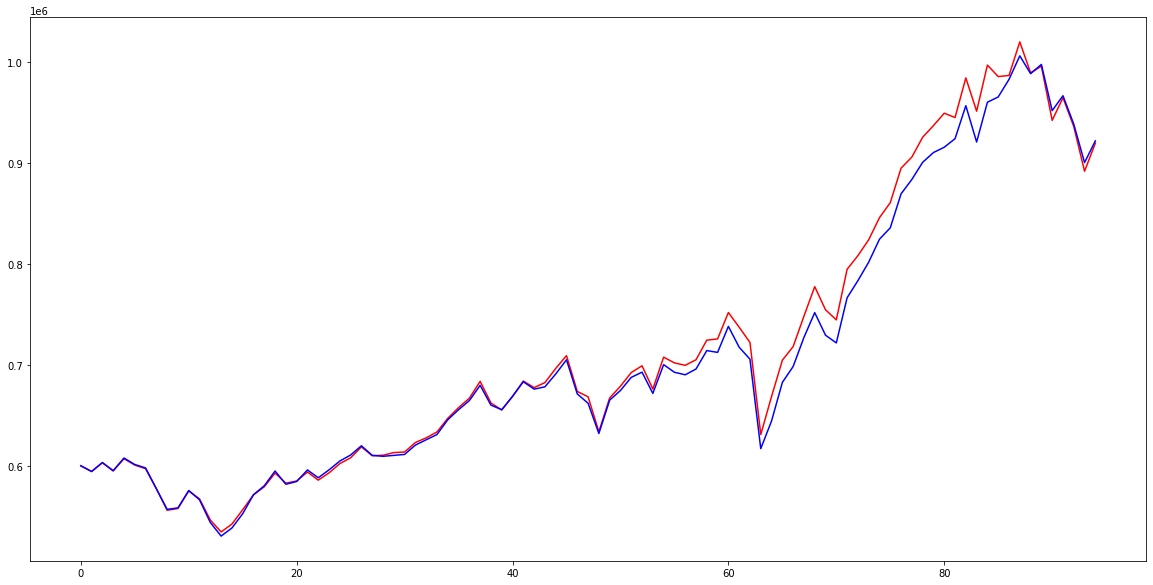

In [ ]:
total2 = np.zeros([len(month_first_returns)])
total2[0] = e_sum[0] + b_sum[0] + c_sum[0]
for i in range(len(month_first_returns)-1):
  e_sum[i+1] = (month_first_returns["SPY"].iloc[i+1:i+2].values+1)*(total2[i]/3)
  b_sum[i+1] = (month_first_returns["GOVT"].iloc[i+1:i+2].values+1)*(total2[i]/3)
  c_sum[i+1] = (month_first_returns["DBC"].iloc[i+1:i+2].values+1)*(total2[i]/3)
  total2[i+1] = e_sum[i+1] + b_sum[i+1] + c_sum[i+1]
  #print(f"Equity: {e_sum[i+1]}, Bond: {b_sum[i+1]}, Commodities: {c_sum[i+1]}, Total: {total[i+1]}")
plt.figure(figsize=(20,10))
plt.plot(total1, color = 'red')
plt.plot(total2, color = 'blue')
plt.show()

In [ ]:
'''

Optimal Portfolio with: 
  1. equal risk
  2. Portfolio risk equal to Portfolio 1
  3. sum of weights  = 1

Input:
  1. Historical Prices (Adjusted Close)
  2. Target Variance

Output: 
  Optimal weights for each security
  
'''

(2, 2)


In [ ]:
'''

Plot Portfolio Performance:
  1. Return each securities weights dollar value
  2. Plot total porfolio value.

  Extras:
  1. Plot weight of each security
  2. Plot variance/risk of each security

'''

In [ ]:
#############################################################
# Part c Chen Chen/ Zehua Cheng


In [7]:
pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
pip install yahoo_fin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install yahoo_fin --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 12.9 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [5]:
import pandas_datareader.data as web
import datetime as dt
import pandas as pd
from dateutil.relativedelta import relativedelta
from pandas.tseries.offsets import MonthEnd
import numpy as np
import requests
import yahoo_fin.stock_info as si
import pandas as pd

In [6]:
# Get ticker symbols or the stocks contained in SNP500

table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers = table.Symbol.tolist()
tickers.remove('BRK.B')
tickers.remove('BF.B')

In [7]:
# Get prices for the DJI components
# Estimated run time about 17 min
start = dt.datetime(2015,1,1)
end = dt.datetime.now()
df = web.DataReader(tickers,'yahoo',start,end)['Adj Close']

In [ ]:
# Calculate monthly returns by cumulating daily returns

mtl_ret = df.pct_change().resample('M').agg(lambda x:(x+1).prod()-1)

In [ ]:
# Calculate returns over the past 11 months, because we are skipping the most recent month

past_11 = (mtl_ret+1).rolling(11).apply(np.prod)-1

In [ ]:
# Set formation date, the day we start buying winner and shorting loser

formation = dt.datetime(2016,12,31)

In [ ]:
end_measurement = formation - MonthEnd(1)

In [ ]:
# Past 11 month performance for formation date and reset it to dataframe
ret_12 = past_11.loc[end_measurement]
ret_12 = ret_12.reset_index()

In [ ]:
# Divide the list into 50 parts, 49th quintile is the best performance and 
# 0th quintile is the worst performance
ret_12['quintile'] = pd.qcut(ret_12.iloc[:,1],50, labels = False, duplicates = 'drop')

In [ ]:
winners = ret_12[ret_12.quintile == 49]
losers = ret_12[ret_12.quintile == 0]

In [ ]:
winner_ret = mtl_ret.loc[formation + MonthEnd(1), df.columns.isin(winners['Symbols'])]
loser_ret = mtl_ret.loc[formation + MonthEnd(1), df.columns.isin(losers['Symbols'])]

In [ ]:
# Longing winners only (no shorting) 

momentum_profit = winner_ret.mean()

In [ ]:
def momentum(formation):
  end_measurement = formation - MonthEnd(1)
  ret_12 = past_11.loc[end_measurement]
  ret_12 = ret_12.reset_index()
  ret_12['quintile'] = pd.qcut(ret_12.iloc[:,1],50,labels=False,duplicates='drop')
  winners = ret_12[ret_12.quintile == 49]
  winner_ret = mtl_ret.loc[formation + MonthEnd(1), df.columns.isin(winners['Symbols'])]
  momentum_profit = winner_ret.mean()
  return momentum_profit

In [ ]:
def diff_month(formation, end):
    return (end.year - formation.year) * 12 + end.month - formation.month

In [ ]:
# Returns from formation date to today(end date)
def ret_up_to_today(formation):
  profits = []
  dates = []

  for i in range(diff_month(formation,end)):
    profits.append(momentum(formation+MonthEnd(i)))
    dates.append(formation+MonthEnd(i))
  return profits

In [ ]:
start = dt.datetime(2015,1,1)
end = dt.datetime.now()
# Get AGG Index for bonds from 2015 to now
bonds = web.DataReader('AGG','yahoo',start=formation,end = end)['Adj Close']
bonds_mtl = bonds.pct_change().resample('M').agg(lambda x:(x+1).prod()-1)

In [ ]:
# Get DJP Index for commodity from 2015 to now
comm = web.DataReader('DJP','yahoo',start = formation,end = end)['Adj Close']
comm_mtl = comm.pct_change().resample('M').agg(lambda x:(x+1).prod()-1)

In [ ]:
portfolio = pd.DataFrame(ret_up_to_today(formation))
portfolio['Bonds'] = bonds_mtl.values
portfolio['Commodities'] = comm_mtl.values
portfolio

,0,Bonds,Commodities
0,0.046532,0.001109,0.018915
1,NaN,0.006459,0.000825
2,0.033196,-0.000553,-0.030503
3,-0.014168,0.009070,-0.018708
4,0.063295,0.006871,-0.017331
...,...,...,...
66,0.127108,0.025381,0.040805
67,0.072068,-0.030423,-0.001657
68,-0.104710,-0.041450,-0.089878
69,0.184824,-0.012785,0.018535


In [ ]:
VTV = web.DataReader('VTV','yahoo',start=formation,end = end)['Adj Close']

In [ ]:
VTV_mtl = VTV.pct_change().resample('M').agg(lambda x:(x+1).prod()-1)

In [ ]:
portfolio2 = pd.DataFrame(1/2*ret_up_to_today(formation)+1/2*VTV_mtl)

In [ ]:
portfolio3 = pd.DataFrame(ret_up_to_today(formation))

In [ ]:
VTV_mtl2 = pd.DataFrame(VTV_mtl)

In [ ]:
VTV_mtl2

,Adj Close
Date,
2017-01-31,-0.001709
2017-02-28,0.035840
2017-03-31,-0.009183
2017-04-30,-0.000315
2017-05-31,0.000629
...,...
2022-07-31,0.050576
2022-08-31,-0.026777
2022-09-30,-0.078117


In [ ]:
portfolio2_ret = 0.5*portfolio3.values + 0.5*VTV_mtl2.values

In [ ]:
portfolio3

,0
0,0.046532
1,NaN
2,0.033196
3,-0.014168
4,0.063295
...,...
66,0.127108
67,0.072068
68,-0.104710
69,0.184824


In [ ]:
portfolio_mv = pd.DataFrame(portfolio2_ret)
portfolio_mv['Bonds'] = bonds_mtl.values
portfolio_mv['Commodities'] = comm_mtl.values
portfolio_mv

,0,Bonds,Commodities
0,0.022411,0.001109,0.018915
1,NaN,0.006459,0.000825
2,0.012007,-0.000553,-0.030503
3,-0.007241,0.009070,-0.018708
4,0.031962,0.006871,-0.017331
...,...,...,...
66,0.088842,0.025381,0.040805
67,0.022645,-0.030423,-0.001657
68,-0.091414,-0.041450,-0.089878
69,0.151085,-0.012785,0.018535
